In [8]:
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss
%matplotlib inline

In [26]:
data = pd.read_csv('data.txt', sep = ',', names = ['Class','Alcohol', 'Malic acid',
 'Ash',
'Alcalinity of ash',  
 'Magnesium',
'Total phenols',
 'Flavanoids',
'Nonflavanoid phenols',
 'Proanthocyanins',
'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline'])
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
X_col = [col for col in data.columns if col != 'Class']
X = data[X_col]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

In [49]:
scores = []
Y = []
x =[ int(n) for n in range (1, 51)]
for i in x:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict_proba(X_test)
    g = log_loss(y_test, pred)
    Y.append(g)
    scores.append([g, i])
l = (sorted(scores)[0])
print(l)

[0.41050293971370294, 4]


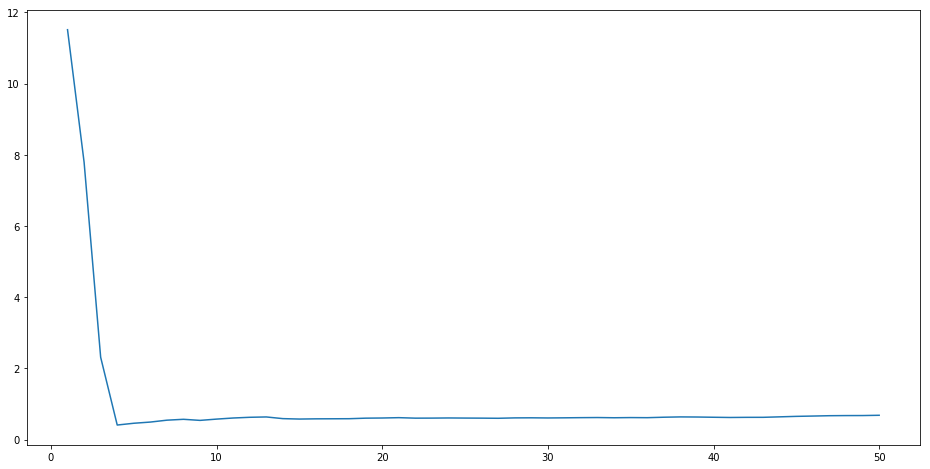

In [50]:
plt.figure(figsize = (16, 8))
plt.plot(x,Y)
plt.show()

[0.41050293971370294, 0.1]


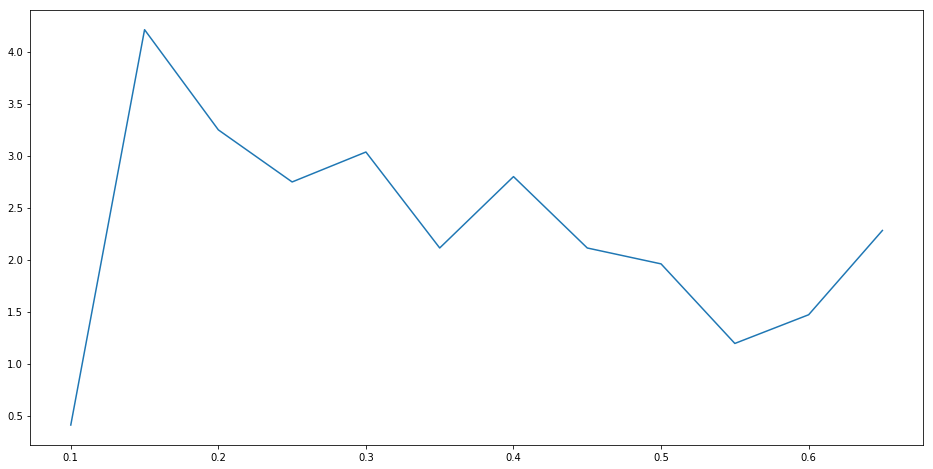

In [51]:
rm = np.arange(0.1, 0.7, 0.05)
Y = []
scores = []
for i in rm:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = float(i), random_state = 10)
    neigh = KNeighborsClassifier(n_neighbors=4)
    neigh.fit(X_train, y_train)
    pred = neigh.predict_proba(X_test)
    t = log_loss(y_test, pred)
    Y.append(t)
    scores.append([t, i])
print (sorted(scores)[0])
plt.figure(figsize = (16, 8))
plt.plot(rm, Y)
plt.show()